In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("bigdatamart_Train.csv")
df1


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df2=pd.read_csv("bigdatamart_Test.csv")
df2


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

# Joining Train and Test Dataset for EDA

Creating source column to separate the data easily later.

In [65]:
df1['source']='train'
df2['source']='test'
data = pd.concat([df1,df2], ignore_index = True)
print(df1.shape, df2.shape, data.shape)

(8523, 11) (5681, 12) (14204, 13)


In [164]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,7.60,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1,NaN,test
14202,15.30,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1,NaN,test


In [68]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'source',
       'Item_Identifier', 'Outlet_Identifier'],
      dtype='object')

In [66]:
data.isnull().sum()

Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Identifier              8523
Outlet_Identifier            8523
dtype: int64

There are null values in the columns Item_Weight , Outlet_Size,Item_Identifier, Outlet_Identifier

In [69]:
data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Item_Identifier               object
Outlet_Identifier             object
dtype: object

This shows the data types of each column 

In [70]:
data['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 3608.636 , 2778.3834,
             nan])

In [71]:
print(data['Item_Outlet_Sales'].value_counts())

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1230.3984    14
             ..
1883.5482     1
5386.9878     1
4231.8248     1
91.2146       1
3653.9104     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64


This gives the value counts of the traget

In [72]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


This gives the statistical values of the train dataset

# EDA

Univatiate analysis

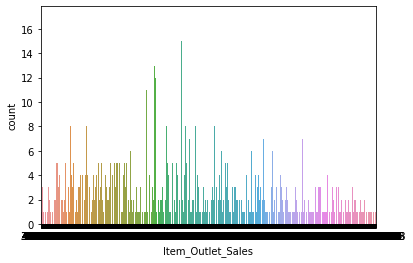

In [73]:
sn.countplot(data['Item_Outlet_Sales']);

It will give the count plot of target column

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

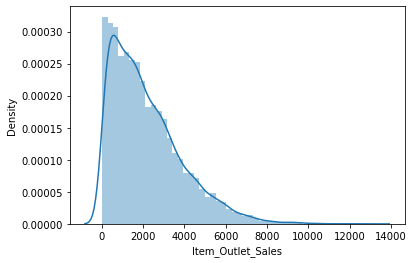

In [74]:
sn.distplot(data["Item_Outlet_Sales"])

This plot shows that the targer column is right skewed

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

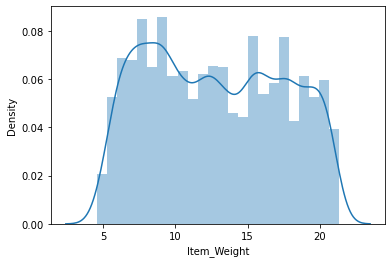

In [75]:
sn.distplot(data["Item_Weight"])

Its almost normally distributed

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

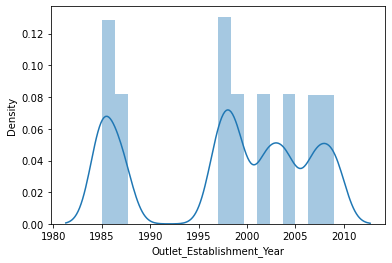

In [76]:
sn.distplot(data["Outlet_Establishment_Year"])

Its not normally distributed

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

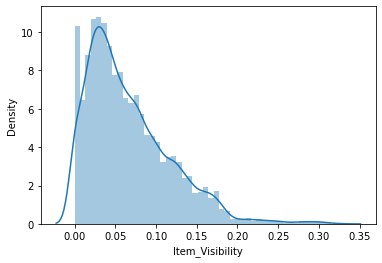

In [77]:
sn.distplot(data["Item_Visibility"])

Its right skewed

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

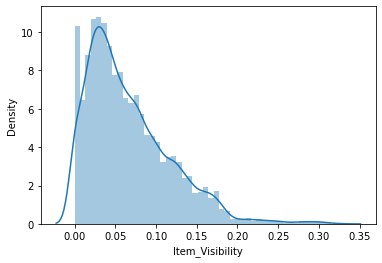

In [78]:
sn.distplot(data["Item_Visibility"])

Item_Weight                     AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Item_Visibility              AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Item_MRP                     AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Item_Outlet_Sales            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
dtype: object

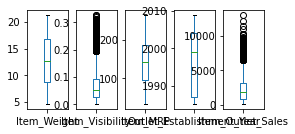

In [79]:
data.plot(kind="box",subplots=True,layout=(2,7))

There are outliers present in Item_Visibility 

# Bivariate analysis

<AxesSubplot:title={'center':'comparison between Item_Weight and Item_Outlet_Sales'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

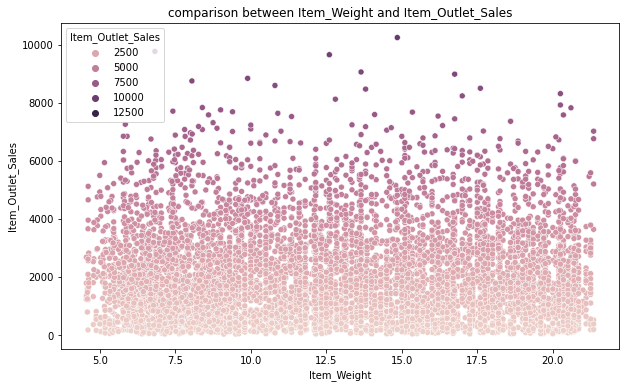

In [80]:
plt.figure(figsize=[10,6])
plt.title("comparison between Item_Weight and Item_Outlet_Sales")
sn.scatterplot(data['Item_Weight'],data['Item_Outlet_Sales'],hue=data["Item_Outlet_Sales"])

It gives the distribution of Item_Outlet_Sales over item_Weight

<AxesSubplot:title={'center':'comparison between Item_MRP and Item_Outlet_Sales'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

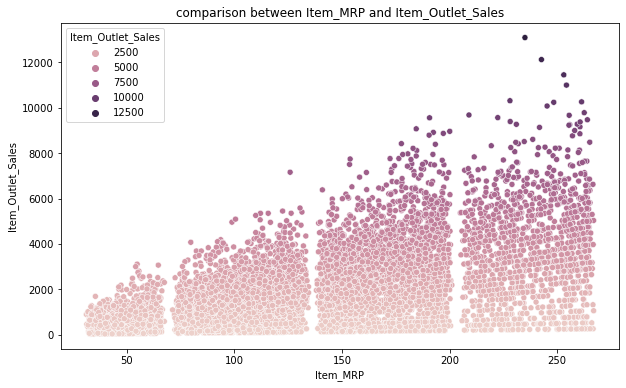

In [81]:
plt.figure(figsize=[10,6])
plt.title("comparison between Item_MRP and Item_Outlet_Sales")
sn.scatterplot(data['Item_MRP'],data['Item_Outlet_Sales'],hue=data["Item_Outlet_Sales"])

It gives the distribution of Item_Outlet_Sales over item_MRP

<AxesSubplot:title={'center':'comparison between Item_Visibility and Item_Outlet_Sales'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

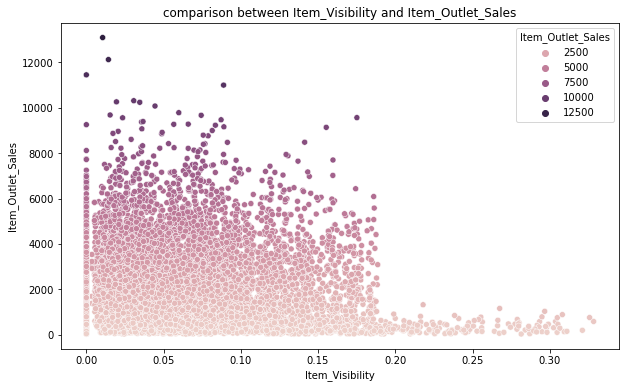

In [82]:
plt.figure(figsize=[10,6])
plt.title("comparison between Item_Visibility and Item_Outlet_Sales")
sn.scatterplot(data['Item_Visibility'],data['Item_Outlet_Sales'],hue=data["Item_Outlet_Sales"])

It gives the distribution of Item_Outlet_Sales over item_Visibility

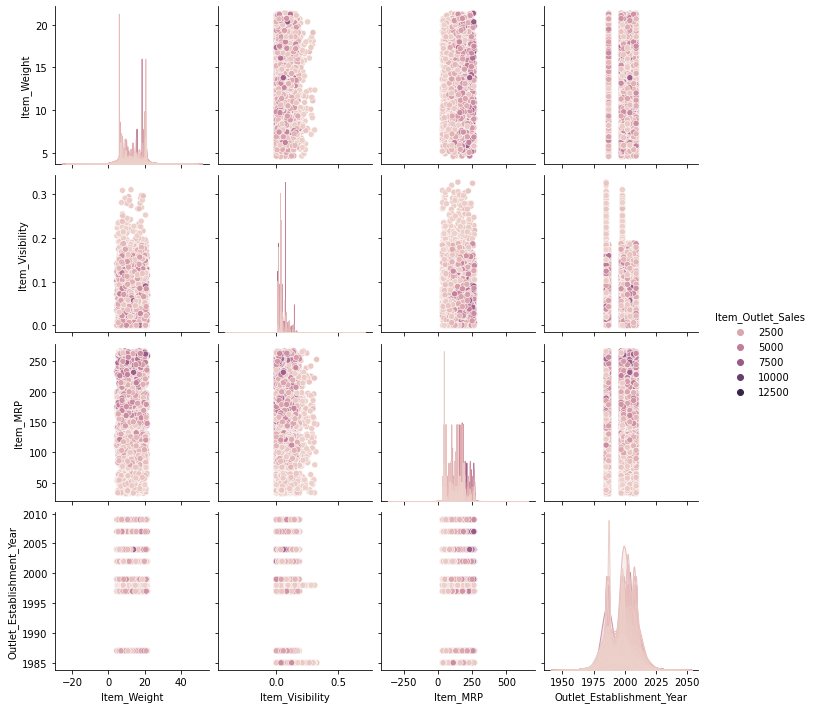

In [83]:
sn.pairplot(data,hue='Item_Outlet_Sales')

It gives the distribution of Item_Outlet_Sales over each column

In [84]:
data.drop(['Item_Identifier','Outlet_Identifier'], axis = 1,inplace=True)

In [85]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,7.60,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,15.30,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1,NaN,test


Dropped two columns

# Imputing missing values

There are null values in the columns Item_Weight , Outlet_Size,Item_Identifier, Outlet_Identifier

In [102]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [104]:
data['Item_Weight'].isnull().sum()

0

In [113]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
#df.Outlet_Size.mode()

In [114]:
data['Outlet_Size'].isnull().sum()

0

In [115]:
data.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [116]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=data.apply(LabelEncoder().fit_transform)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,284,1,1097,4,7567,4,1,0,1,2540,1
1,57,2,1436,14,632,8,1,2,2,422,1
2,376,1,1172,10,3897,4,1,0,1,1639,1
3,393,2,0,6,5626,3,1,2,0,670,1
4,265,1,0,9,848,1,0,2,1,865,1
...,...,...,...,...,...,...,...,...,...,...,...
14199,298,2,718,13,3881,2,2,0,1,3493,0
14200,180,2,11820,15,5069,8,1,2,2,3493,0
14201,293,1,8009,8,3196,5,1,1,1,3493,0
14202,354,2,0,3,6626,7,1,1,1,3493,0


All data converted from string to numbers

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

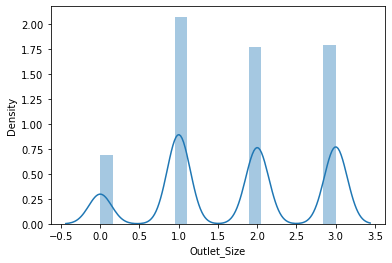

In [88]:
sn.distplot(df["Outlet_Size"])

not normaly distributed

In [117]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [118]:
cor=df.corr()
cor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
Item_Weight,1.000000,-0.024527,-0.003890,0.036341,0.024470,-0.079270,0.019498,0.009454,0.054561,-0.006861,0.015594
Item_Fat_Content,-0.024527,1.000000,0.038220,-0.121140,-0.006551,-0.002541,-0.007084,-0.002518,-0.002380,0.003605,0.000442
Item_Visibility,-0.003890,0.038220,1.000000,-0.045290,0.000989,-0.063153,0.044870,-0.009642,-0.118253,-0.052196,0.002292
Item_Type,0.036341,-0.121140,-0.045290,1.000000,0.048657,0.003295,-0.002608,0.002083,0.004305,0.009857,-0.000782
Item_MRP,0.024470,-0.006551,0.000989,0.048657,1.000000,0.000203,-0.001096,0.000994,0.000064,0.264443,-0.000397
Outlet_Establishment_Year,-0.079270,-0.002541,-0.063153,0.003295,0.000203,1.000000,0.070796,0.041889,-0.040255,0.011100,0.000186
Outlet_Size,0.019498,-0.007084,0.044870,-0.002608,-0.001096,0.070796,1.000000,-0.614300,-0.201505,-0.045569,-0.000072
Outlet_Location_Type,0.009454,-0.002518,-0.009642,0.002083,0.000994,0.041889,-0.614300,1.000000,0.467251,0.034298,0.000023
Outlet_Type,0.054561,-0.002380,-0.118253,0.004305,0.000064,-0.040255,-0.201505,0.467251,1.000000,0.194788,-0.000094
Item_Outlet_Sales,-0.006861,0.003605,-0.052196,0.009857,0.264443,0.011100,-0.045569,0.034298,0.194788,1.000000,-0.804977


These are the correlation between the data from columns

<AxesSubplot:>

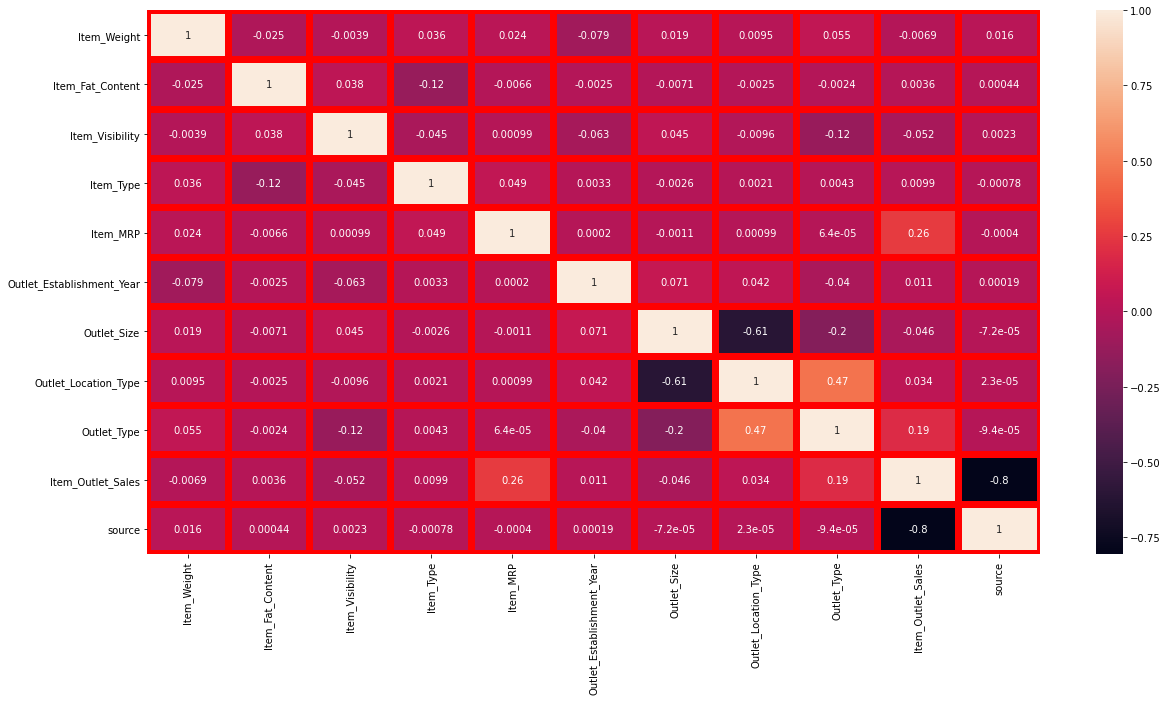

In [119]:
plt.figure(figsize=[20,10])
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

There are no data highly correlatd with any other data.  But  variable source is highly negatively correlated with target 

In [158]:
#dfa=df.drop(['source'], axis = 1)
#dfa

# Outlier removing

In [35]:
from scipy.stats import zscore

In [159]:
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [160]:
new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,284,1,1097,4,7567,4,1,0,1,2540,1
1,57,2,1436,14,632,8,1,2,2,422,1
2,376,1,1172,10,3897,4,1,0,1,1639,1
3,393,2,0,6,5626,3,1,2,0,670,1
4,265,1,0,9,848,1,0,2,1,865,1
...,...,...,...,...,...,...,...,...,...,...,...
14199,298,2,718,13,3881,2,2,0,1,3493,0
14200,180,2,11820,15,5069,8,1,2,2,3493,0
14201,293,1,8009,8,3196,5,1,1,1,3493,0
14202,354,2,0,3,6626,7,1,1,1,3493,0


In [161]:
new_df.shape

(13944, 11)

some rows deleted

# skewness

In [162]:
new_df.skew()

Item_Weight                 -1.396898
Item_Fat_Content             0.278518
Item_Visibility              0.020637
Item_Type                    0.091959
Item_MRP                     0.023993
Outlet_Establishment_Year    0.036093
Outlet_Size                 -0.087041
Outlet_Location_Type        -0.210582
Outlet_Type                  0.923905
Item_Outlet_Sales           -0.410950
source                      -0.407865
dtype: float64

There are skewness present in Item_Weight and Outlet_Type . But data must be positive so its not possible to remove that                                

In [163]:
from scipy.stats import boxcox
new_df['Item_Weight']=boxcox(new_df['Item_Weight'],0)

Removed the skewness

Dividing into test and train based on the source column added before

In [169]:
train = new_df.loc[new_df['source']==1]
test = new_df.loc[new_df['source']==0]

In [174]:
train.drop(["source"],axis=1,inplace=True)


In [176]:
test.drop(["source"],axis=1,inplace=True)

In [177]:
train.shape

(8365, 10)

In [178]:
test.shape

(5579, 10)

# seperation columns into features and target

In [185]:
x_train=train.iloc[:,0:-1]
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,5.648974,1,1097,4,7567,4,1,0,1
1,4.043051,2,1436,14,632,8,1,2,2
2,5.929589,1,1172,10,3897,4,1,0,1
3,5.973810,2,0,6,5626,3,1,2,0
4,5.579730,1,0,9,848,1,0,2,1


In [186]:
x_train.shape

(8365, 9)

In [181]:
y_train=train.iloc[:,-1]
y_train.head()

0    2540
1     422
2    1639
3     670
4     865
Name: Item_Outlet_Sales, dtype: int64

In [188]:
x_test =test.iloc[:,0:-1]
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,6.013715,1,163,13,2699,4,1,0,1
8525,5.837730,1,9904,11,7363,3,1,2,0
8526,5.062595,1,988,13,4499,7,1,1,1
8527,5.780744,2,10826,4,7166,0,1,2,3
8528,5.673323,2,7130,6,3127,2,2,0,1
...,...,...,...,...,...,...,...,...,...
14199,5.697093,2,718,13,3881,2,2,0,1
14200,5.192957,2,11820,15,5069,8,1,2,2
14201,5.680173,1,8009,8,3196,5,1,1,1
14202,5.869297,2,0,3,6626,7,1,1,1


In [197]:
y_test=test.iloc[:,-1]
y_test.head()

8523    3493
8525    3493
8526    3493
8527    3493
8528    3493
Name: Item_Outlet_Sales, dtype: int64

# scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Find the best random states use here

In [61]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=12)

In [189]:
lr.fit(x_train,y_train)

LinearRegression()

In [190]:
lr_pred = lr.predict(x_test)

linear regression fitting into x-train and y-train

In [192]:
lr_accuracy = round(lr.score(x_train,y_train) * 100,2)
lr_accuracy

55.16

In [193]:
lr.coef_

array([-2.96888002e+01,  2.26818555e+01, -9.85981387e-03, -5.43858585e-01,
        2.34913563e-01,  2.15660086e+01, -2.61554706e+02, -3.10878752e+02,
        5.97762305e+02])

Got the linear regression coefficient

In [194]:
lr.intercept_

649.6279406154067

Got the linear regression constant

# Regularization

In [195]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [200]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)
tree_accuracy = round(tree.score(x_train,y_train)*100,2)
print(tree_accuracy)

67.28


In [201]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_accuracy = round(rf.score(x_train,y_train)*100,2)
print(rf_accuracy)

66.68


DecisionTreeRegressor gives the best accuracy 67.28%

# Saving the model

In [202]:
import pickle
filename='Big Data Mart.pkl'
pickle.dump(rf,open(filename,'wb'))

saved the model